In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import pulse2percept as p2p

2017-04-03 13:46:10,607 [pulse2percept] [INFO] Welcome to pulse2percept


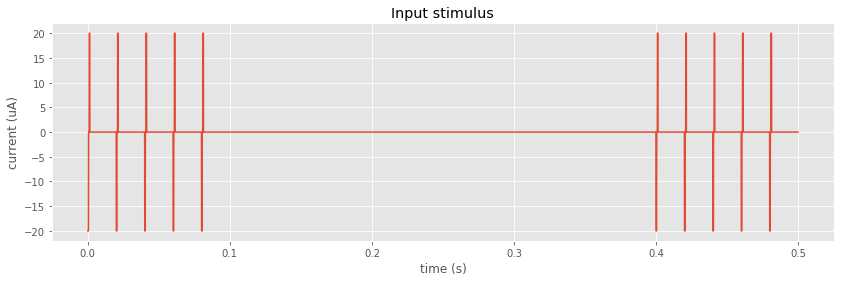

In [2]:
# The stimulus: 50Hz, 20uA for 0.1 seconds, then silence, then the first one again
tsample = 5e-6
stim = p2p.stimuli.PulseTrain(tsample, freq=50, amp=20, dur=0.1,
                            pulse_dur=0.45 / 1000, interphase_dur=0.45 / 1000)
nostim = p2p.stimuli.PulseTrain(tsample, freq=0, dur=0.3)

pt = stim + nostim + stim
t = np.arange(0, pt.duration, pt.tsample)

plt.figure(figsize=(14, 4))
plt.plot(t, pt.data)
plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.title('Input stimulus')

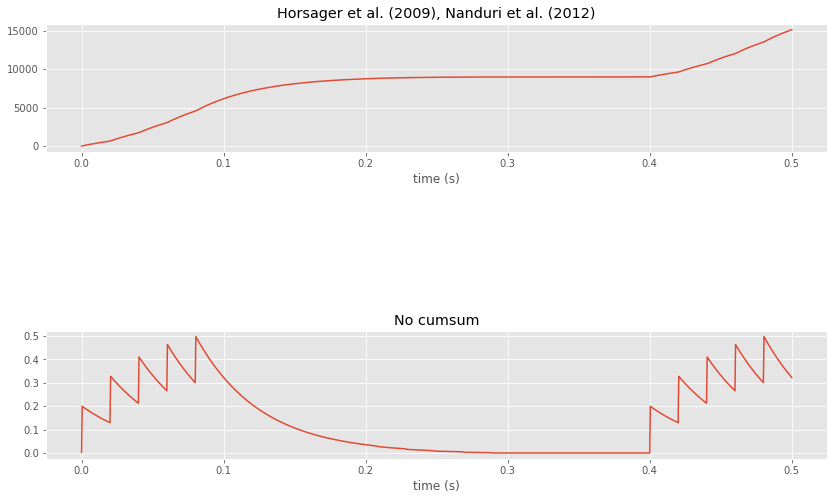

In [3]:
_, gamma2 = p2p.utils.gamma(1, 45.25 / 1000, tsample)

oldca = p2p.utils.conv(np.cumsum(np.maximum(0, -pt.data)), gamma2, tsample,
                       mode='full', method='fft')[:pt.data.size]
newca = p2p.utils.conv(np.maximum(0, -pt.data), gamma2, tsample,
                       mode='full', method='fft')[:pt.data.size]

plt.figure(figsize=(14, 8))
plt.subplot(311)
plt.plot(t, oldca)
plt.xlabel('time (s)')
plt.title('Horsager et al. (2009), Nanduri et al. (2012)')

plt.subplot(313)
plt.plot(t, newca)
plt.xlabel('time (s)')
plt.title('No cumsum')